<a href="https://colab.research.google.com/github/karmanandan/my_colab/blob/master/Linear_Regression_with_Numpy_and_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regrerssion with Numpy

In [ ]:
# Import Required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
class LinearRegression:

    def __init__(self, learning_rate=0.001, n_iters=10000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
 

    def predict(self, X):
        # dot product of X_test and trained weights
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

    def rmse(self, predictions, targets):
      return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
# load model
lr = LinearRegression()

In [ ]:
# create dummy to test
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3

In [ ]:
# fit the model
lr.fit(X,y)

In [ ]:
# predict the train data
predict = lr.predict(X)
predict

array([ 5.63264689,  7.72018347,  9.14303192, 11.2305685 ])

In [ ]:
# original values
y

array([ 6,  8,  9, 11])

In [ ]:
lr.rmse(predict,y)

0.2677991577497642

In [ ]:
# test2:
X_test = np.array([[2, 5], [2, 7], [3, 4], [3, 7]])
y_test = np.dot(X, np.array([2, 4])) + 3

In [ ]:
y_test

array([ 9, 13, 15, 19])

In [ ]:
predict_test = lr.predict(X_test)
predict_test

array([15.40564166, 19.58071482, 14.74095352, 21.00356326])

In [ ]:
lr.rmse(predict_test,y_test)

4.701580144293446

In [ ]:
mean_squared_error(y_test, predict_test,squared=False)

4.701580144293446

In [ ]:
# verify with sklearn 

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression().fit(X,y)
lr_model.score(X, y)

1.0

In [ ]:
lr_model_pred = lr_model.predict(X_test)
lr_model_pred

array([15., 19., 14., 20.])

In [ ]:
mean_squared_error(y_test, lr_model_pred,squared=False)

4.30116263352131

# Linear Regression with Torch

In [ ]:
import torch
import torch.nn as nn
from sklearn import datasets

Epoch 10, Loss 6895.7651
Epoch 20, Loss 6646.0420
Epoch 30, Loss 6405.9312
Epoch 40, Loss 6175.0605
Epoch 50, Loss 5953.0737
Epoch 60, Loss 5739.6279
Epoch 70, Loss 5534.3955
Epoch 80, Loss 5337.0586
Epoch 90, Loss 5147.3125
Epoch 100, Loss 4964.8652
Epoch 110, Loss 4789.4346
Epoch 120, Loss 4620.7515
Epoch 130, Loss 4458.5547
Epoch 140, Loss 4302.5952
Epoch 150, Loss 4152.6313
Epoch 160, Loss 4008.4331
Epoch 170, Loss 3869.7781
Epoch 180, Loss 3736.4526
Epoch 190, Loss 3608.2520
Epoch 200, Loss 3484.9780
Epoch 210, Loss 3366.4417
Epoch 220, Loss 3252.4602
Epoch 230, Loss 3142.8584
Epoch 240, Loss 3037.4670
Epoch 250, Loss 2936.1243
Epoch 260, Loss 2838.6746
Epoch 270, Loss 2744.9683
Epoch 280, Loss 2654.8601
Epoch 290, Loss 2568.2131
Epoch 300, Loss 2484.8933
Epoch 310, Loss 2404.7725
Epoch 320, Loss 2327.7275
Epoch 330, Loss 2253.6409
Epoch 340, Loss 2182.3982
Epoch 350, Loss 2113.8899
Epoch 360, Loss 2048.0110
Epoch 370, Loss 1984.6609
Epoch 380, Loss 1923.7412
Epoch 390, Loss 1865.

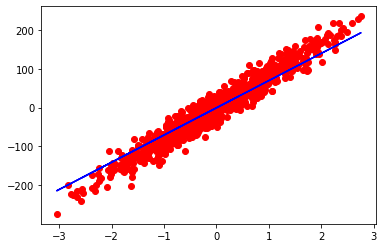

In [ ]:
X_numpy, y_numpy = datasets.make_regression(n_samples=1000, n_features=1, noise=20,
                                            random_state=0)
X = torch.from_numpy(X_numpy.astype('float32'))
y = torch.from_numpy(y_numpy.astype('float32'))

y = y.view(y.shape[0],1)

n_samples, n_features = X.shape

input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

learning_rate = 0.001
loss_criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
num_epochs = 1000

for i in range(num_epochs):
  y_predicted = model(X)
  loss = loss_criterion(y_predicted,y)

  loss.backward()
  optimizer.step()

  optimizer.zero_grad()

  if (i+1)%10==0:
    print(f'Epoch {i+1}, Loss {loss.item():.4f}')

predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()